In [0]:
from keras import backend as K
from keras.models import Sequential
from keras. layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.core import Activation,Flatten,Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD,Adam,RMSprop
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
np.random.seed(1671)

In [0]:
class LeNet:
  @staticmethod
  def build(input_shape,classes):
    model=Sequential()
    
    model.add(Conv2D(20,kernel_size=5,padding="same",input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(20,kernel_size=5,padding="same",input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))
    
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    
    return model
  

In [0]:
NB_EPOCH=20
BATCH_SIZE=128
VERBOSE=1
OPTIMIZER=Adam()
VALIDATION_SPLIT=0.2


In [0]:
IMG_ROWS,IMG_COLS=28,28
NB_CLASSES=10
INPUT_SHAPE=(1,IMG_ROWS,IMG_COLS)

In [11]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
K.set_image_dim_ordering('th')

11501568/11490434 [==============================] - 1s 0us/step


In [0]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train /=255
X_test  /=255

In [13]:
X_train=X_train[:,np.newaxis,:,:]
X_test =X_test[:,np.newaxis,:,:]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(60000, 'train samples')
(10000, 'test samples')


In [0]:
y_train=np_utils.to_categorical(y_train,NB_CLASSES)
y_test=np_utils.to_categorical(y_test,NB_CLASSES)

In [0]:
model=LeNet.build(input_shape=INPUT_SHAPE,classes=NB_CLASSES)

In [0]:
model.compile(loss="categorical_crossentropy",optimizer=OPTIMIZER,metrics=["accuracy"])

In [17]:
history=model.fit(X_train,y_train,
                 batch_size=BATCH_SIZE,epochs=NB_EPOCH,
                 verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 118us/step - loss: 0.2219 - acc: 0.9340 - val_loss: 0.0751 - val_acc: 0.9769
Epoch 2/20
48000/48000 [==============================] - 4s 92us/step - loss: 0.0604 - acc: 0.9818 - val_loss: 0.0599 - val_acc: 0.9811
Epoch 3/20
48000/48000 [==============================] - 4s 91us/step - loss: 0.0407 - acc: 0.9875 - val_loss: 0.0475 - val_acc: 0.9860
Epoch 4/20
38912/48000 [=======================>......] - ETA: 0s - loss: 0.0273 - acc: 0.9911

48000/48000 [==============================] - 4s 92us/step - loss: 0.0284 - acc: 0.9908 - val_loss: 0.0494 - val_acc: 0.9848
Epoch 5/20
48000/48000 [==============================] - 4s 92us/step - loss: 0.0228 - acc: 0.9927 - val_loss: 0.0373 - val_acc: 0.9892
Epoch 6/20
48000/48000 [==============================] - 4s 91us/step - loss: 0.0159 - acc: 0.9948 - val_loss: 0.0394 - val_acc: 0.9891
Epoch 7/20
48000/48000 [==============================] - 4s 91us/step - loss: 0.0132 - acc: 0.9957 - val_loss: 0.0369 - val_acc: 0.9883
Epoch 8/20
16000/48000 [=========>....................] - ETA: 2s - loss: 0.0077 - acc: 0.9974

48000/48000 [==============================] - 4s 92us/step - loss: 0.0114 - acc: 0.9965 - val_loss: 0.0443 - val_acc: 0.9883
Epoch 9/20
48000/48000 [==============================] - 4s 91us/step - loss: 0.0110 - acc: 0.9966 - val_loss: 0.0369 - val_acc: 0.9902
Epoch 10/20
48000/48000 [==============================] - 4s 90us/step - loss: 0.0090 - acc: 0.9968 - val_loss: 0.0406 - val_acc: 0.9908
Epoch 11/20
48000/48000 [==============================] - 4s 91us/step - loss: 0.0076 - acc: 0.9975 - val_loss: 0.0382 - val_acc: 0.9899
Epoch 12/20
12800/48000 [=======>......................] - ETA: 2s - loss: 0.0058 - acc: 0.9980

48000/48000 [==============================] - 4s 92us/step - loss: 0.0082 - acc: 0.9972 - val_loss: 0.0637 - val_acc: 0.9841
Epoch 13/20
48000/48000 [==============================] - 4s 91us/step - loss: 0.0067 - acc: 0.9977 - val_loss: 0.0394 - val_acc: 0.9912
Epoch 14/20
48000/48000 [==============================] - 4s 91us/step - loss: 0.0049 - acc: 0.9985 - val_loss: 0.0488 - val_acc: 0.9901
Epoch 15/20
48000/48000 [==============================] - 4s 90us/step - loss: 0.0060 - acc: 0.9980 - val_loss: 0.0399 - val_acc: 0.9907
Epoch 16/20
12288/48000 [======>.......................] - ETA: 2s - loss: 0.0041 - acc: 0.9985

48000/48000 [==============================] - 4s 90us/step - loss: 0.0063 - acc: 0.9979 - val_loss: 0.0385 - val_acc: 0.9911
Epoch 17/20
48000/48000 [==============================] - 4s 91us/step - loss: 0.0052 - acc: 0.9982 - val_loss: 0.0385 - val_acc: 0.9912
Epoch 18/20
48000/48000 [==============================] - 4s 90us/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0464 - val_acc: 0.9900
Epoch 19/20
48000/48000 [==============================] - 4s 90us/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0385 - val_acc: 0.9908
Epoch 20/20
11648/48000 [======>.......................] - ETA: 3s - loss: 0.0016 - acc: 0.9995

48000/48000 [==============================] - 4s 92us/step - loss: 0.0049 - acc: 0.9983 - val_loss: 0.0438 - val_acc: 0.9895


In [18]:
score=model.evaluate(X_test,y_test,verbose=VERBOSE)

10000/10000 [==============================] - 1s 82us/step


In [19]:
print("\n Test Score:",score[0])
print('Test accuracy' ,score[1])

('\n Test Score:', 0.047552050150910054)
('Test accuracy', 0.9888)


In [20]:
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


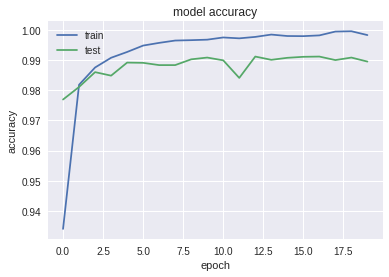

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

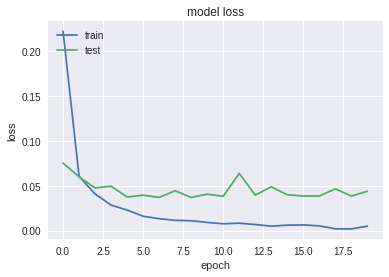

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()